In [1]:
from datasets import load_dataset
import pandas as pd
import numpy as np
from tqdm import tqdm

In [44]:
import seaborn as sns

In [60]:
import matplotlib.pyplot as plt

In [45]:
%matplotlib widget

# Load WandB results (val loss)

In [2]:
import wandb

api = wandb.Api()
entity, project = "loubnabnl", "scaling_laws"  # set to your entity and project 
runs = api.runs(entity + "/" + project) 

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
         if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

orig_runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

def expand_dict_to_columns(df, col):
    return pd.concat([df.drop([col], axis=1),  pd.json_normalize(df[col])], axis=1)

run_df = expand_dict_to_columns(orig_runs_df, "summary")
run_df = expand_dict_to_columns(run_df, "config")

keep_cols = [c for c in run_df if "lm-loss-validation/TEST_" not in c]
run_df = run_df[keep_cols]

df_run = run_df[run_df["_step"] >= .99 * run_df["train_iters"]]
df_run.head(2)

,name,_timestamp,loss-scale,learning-rate,_step,lm loss,samples,_runtime,grad-norm,lm loss validation,...,train_weighted_split_paths,valid_weighted_split_names,valid_weighted_split_paths,train_weighted_split_splits,valid_weighted_split_splits,train_weighted_split_weights,valid_weighted_split_weights,test_weighted_split_paths_path,train_weighted_split_paths_path,valid_weighted_split_paths_path
11,run_7302.6M_6e+19_bs1_idx_69-pp2-8,1.679240e+09,1.0,4.467839e-09,1305.0,1.779671,665600.0,10447.029247,0.22727,NaN,...,[[/fsx/loubna/data/stack_new/code/css/gpt2-pre...,"[VALID_css, VALID_prolog, VALID_c, VALID_fortr...",[[/fsx/loubna/data/stack_new/code/css/gpt2-pre...,"[[0:0.969, 0:0.969, 0:0.969, 0:0.969, 0:0.969,...","[[0.969:0.999], [0.969:0.999], [0.969:0.999], ...","[[3.0, 0.01, 53.89, 1.78, 0.85, 5.68, 0.01, 1....","[[1], [1], [1], [1], [1], [1], [1], [1], [1], ...",NaN,NaN,NaN
12,run_7302.6M_3e+20_bs1_idx_96-pp2-16,1.679259e+09,1.0,5.786455e-10,6529.0,1.241626,3338240.0,29714.369224,0.140716,NaN,...,[[/fsx/loubna/data/stack_new/code/css/gpt2-pre...,"[VALID_css, VALID_prolog, VALID_c, VALID_fortr...",[[/fsx/loubna/data/stack_new/code/css/gpt2-pre...,"[[0:0.969, 0:0.969, 0:0.969, 0:0.969, 0:0.969,...","[[0.969:0.999], [0.969:0.999], [0.969:0.999], ...","[[3.0, 0.01, 53.89, 1.78, 0.85, 5.68, 0.01, 1....","[[1], [1], [1], [1], [1], [1], [1], [1], [1], ...",NaN,NaN,NaN


In [3]:
# Fix run-name
df_run['name'][df_run['name'] == "3B-MQA-TP1_113"] = "run_3026.4M_1e+21_bs2_idx_113"
df_run['name'][df_run['name'] == "run_5360.3M_1e+20_bs2_idx_83-tp1-pp2-16"] = "run_5360.3M_1e+20_bs2_idx_83"
df_run['name'][df_run['name'] == "run_5360.3M_1e+21_bs2_idx_114-tp1-pp2-16"] = "run_5360.3M_1e+21_bs2_idx_114"
df_run['name'][df_run['name'] == "run_5360.3M_3e+20_bs2_idx_95-tp1-pp2-16"] = "run_5360.3M_3e+20_bs2_idx_95"
df_run['name'][df_run['name'] == "run_5360.3M_6e+19_bs2_idx_68-tp1-pp2-16"] = "run_5360.3M_6e+19_bs2_idx_68"
df_run['name'][df_run['name'] == "run_5360.3M_6e+20_bs2_idx_105-tp1-pp2-32"] = "run_5360.3M_6e+20_bs2_idx_105"
df_run['name'][df_run['name'] == "run_7302.6M_1e+21_bs1_idx_115-pp2-nl42-16"] = "run_7302.6M_1e+21_bs1_idx_115"
df_run['name'][df_run['name'] == "run_7302.6M_3e+20_bs1_idx_96-pp2-16"] = "run_7302.6M_3e+20_bs1_idx_96"

/tmp/ipykernel_36/27703861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_run['name'][df_run['name'] == "3B-MQA-TP1_113"] = "run_3026.4M_1e+21_bs2_idx_113"
/tmp/ipykernel_36/27703861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_run['name'][df_run['name'] == "3B-MQA-TP1_113"] = "run_3026.4M_1e+21_bs2_idx_113"
/tmp/ipykernel_36/27703861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_run['name'][df_run['name'] ==

# Load HumanEval results

In [4]:
from typing import List, Union, Iterable, Dict

def estimator(n: int, c: int, k: int) -> float:
    """
    Calculates 1 - comb(n - c, k) / comb(n, k).
    """
    if n - c < k:
        return 1.0
    return 1.0 - np.prod(1.0 - k / np.arange(n - c + 1, n + 1))

def estimate_pass_at_k(
    num_samples: Union[int, List[int], np.ndarray],
    num_correct: Union[List[int], np.ndarray],
    k: int
) -> np.ndarray:
    """
    Estimates pass@k of each problem and returns them in an array.
    """

    if isinstance(num_samples, int):
        num_samples_it = itertools.repeat(num_samples, len(num_correct))
    else:
        assert len(num_samples) == len(num_correct)
        num_samples_it = iter(num_samples)

    return np.array([estimator(int(n), int(c), k) for n, c in zip(num_samples_it, num_correct)])

In [5]:
def pass_rate(df, k):
    return df.apply(lambda row: estimator(row["NumCompletions"], row["NumPassed"], k), axis=1)

def log_pass_rate(df, k):
    return df.apply(lambda row: np.log10(estimator(row["NumCompletions"], row["NumPassed"], k)), axis=1)

def compute_pass_rates(df, ks):
    """
    Compute mean-pass-rate and mean-log-pass-rate for each (model, language)
    df: (problem, model, language)
    
    return: (model, language)
    """
    required_col = ["BaseDataset", "ProblemName", "Model", "Language", "Temperature", "NumPassed", "NumCompletions"]
    for col in required_col:
        assert col in df.columns
    
    dfs = []
    for k in tqdm(ks):
        df_with_pass_rate = df.copy()
        df_with_pass_rate["k"] = k
        df_with_pass_rate["PassRate"] = pass_rate(df_with_pass_rate, k)
        df_with_pass_rate["LogPassRate"] = log_pass_rate(df_with_pass_rate, k)
        
        mean_pass_rates = df_with_pass_rate.groupby(["BaseDataset", "Model", "Language", "Temperature"]).mean()
        
        dfs.append(mean_pass_rates)
    return pd.concat(dfs)

In [206]:
he_results[he_results["Model"].str.contains("1124.9M_1e\+21")]

,BaseDataset,ProblemName,Model,Language,Temperature,NumPassed,NumCompletions
0,humaneval,HumanEval_0_has_close_elements,bigcode_scalinglaws_run_1124.9M_1e+21_bs8_idx_110,cpp,0.8,3,200
1,humaneval,HumanEval_100_make_a_pile,bigcode_scalinglaws_run_1124.9M_1e+21_bs8_idx_110,cpp,0.8,0,200
2,humaneval,HumanEval_101_words_string,bigcode_scalinglaws_run_1124.9M_1e+21_bs8_idx_110,cpp,0.8,1,200
3,humaneval,HumanEval_102_choose_num,bigcode_scalinglaws_run_1124.9M_1e+21_bs8_idx_110,cpp,0.8,0,200
4,humaneval,HumanEval_103_rounded_avg,bigcode_scalinglaws_run_1124.9M_1e+21_bs8_idx_110,cpp,0.8,0,200
...,...,...,...,...,...,...,...
323356,humaneval,HumanEval_96_count_up_to,bigcode_scalinglaws_run_1124.9M_1e+21_bs8_idx_110,ts,0.8,1,200
323357,humaneval,HumanEval_97_multiply,bigcode_scalinglaws_run_1124.9M_1e+21_bs8_idx_110,ts,0.8,0,200
323358,humaneval,HumanEval_98_count_upper,bigcode_scalinglaws_run_1124.9M_1e+21_bs8_idx_110,ts,0.8,2,200
323359,humaneval,HumanEval_99_closest_integer,bigcode_scalinglaws_run_1124.9M_1e+21_bs8_idx_110,ts,0.8,0,200


In [210]:
df_problems = he_results[(he_results["Model"].str.contains("1124.9M_1e\+21")) & (he_results["Language"] == "py")].groupby(["ProblemName", "Language"]).min()

In [238]:
len(df_problems[(df_problems["NumPassed"] > 1) & (df_problems["NumPassed"] < 201)])

43

In [229]:
list(zip(*df_problems[df_problems["NumPassed"] > 1].index))[0]

('HumanEval_0_has_close_elements',
 'HumanEval_11_string_xor',
 'HumanEval_12_longest',
 'HumanEval_13_greatest_common_divisor',
 'HumanEval_152_compare',
 'HumanEval_158_find_max',
 'HumanEval_15_string_sequence',
 'HumanEval_162_string_to_md5',
 'HumanEval_16_count_distinct_characters',
 'HumanEval_18_how_many_times',
 'HumanEval_21_rescale_to_unit',
 'HumanEval_22_filter_integers',
 'HumanEval_23_strlen',
 'HumanEval_26_remove_duplicates',
 'HumanEval_27_flip_case',
 'HumanEval_28_concatenate',
 'HumanEval_29_filter_by_prefix',
 'HumanEval_30_get_positive',
 'HumanEval_31_is_prime',
 'HumanEval_34_unique',
 'HumanEval_35_max_element',
 'HumanEval_3_below_zero',
 'HumanEval_42_incr_list',
 'HumanEval_43_pairs_sum_to_zero',
 'HumanEval_45_triangle_area',
 'HumanEval_47_median',
 'HumanEval_48_is_palindrome',
 'HumanEval_49_modp',
 'HumanEval_4_mean_absolute_deviation',
 'HumanEval_51_remove_vowels',
 'HumanEval_52_below_threshold',
 'HumanEval_53_add',
 'HumanEval_54_same_chars',
 'Hu

In [6]:
he_results = load_dataset("nuprl/pass_k_with_MultiPL-E", revision="bigcode_scaling_laws")
he_results = he_results['train'].to_pandas()

pass_rates = compute_pass_rates(he_results, [1, 10, 100])
pass_rates = pass_rates.reset_index()

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/340214 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /transformers_cache/datasets/nuprl___parquet/nuprl--pass_k_with_MultiPL-E-5294c8913386bb05/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]/tmp/ipykernel_36/1476877183.py:5: RuntimeWarning: divide by zero encountered in log10
  return df.apply(lambda row: np.log10(estimator(row["NumCompletions"], row["NumPassed"], k)), axis=1)
/tmp/ipykernel_36/1476877183.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_pass_rates = df_with_pass_rate.groupby(["BaseDataset", "Model", "Language", "Temperature"]).mean()
 33%|███▎      | 1/3 [00:24<00:49, 24.61s/it]/tmp/ipykernel_36/1476877183.py:5: RuntimeWarning: divide by zero encountered in log10
  return df.apply(lambda row: np.log10(estimator(row["NumCompletions"], row["NumPassed"], k)), axis=1)
/tmp/ipykernel_36/1476877183.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only 

In [7]:
# pass_rates.map(lambda x: {"idx": int(x["Model"].split("idx_")[1].split("-")[0])})
pass_rates["idx"] = pass_rates["Model"].map(lambda model: int(model.split("idx_")[1].split("-")[0]))

In [8]:
df_scores = pass_rates

In [9]:
df_scores.head(2)

,BaseDataset,Model,Language,Temperature,NumPassed,NumCompletions,k,PassRate,LogPassRate,idx
0,humaneval,bigcode_scalinglaws_run_11.4M_1e+19_bs64_idx_25,cpp,0.8,0.000000,200.0,1.0,0.000000,NaN,25
1,humaneval,bigcode_scalinglaws_run_11.4M_1e+19_bs64_idx_25,cs,0.8,0.025316,200.0,1.0,0.000127,NaN,25


# Load csv: original list of experiments (idx, model_size, compute, training length)

In [11]:
df_experiments = pd.read_csv("scaling_laws.csv")

In [12]:
df = df_scores.merge(df_experiments, how="left", on="idx")

In [13]:
df.sort_values(by="PassRate", ascending=False).head(3)

,BaseDataset,Model,Language,Temperature,NumPassed,NumCompletions,k,PassRate,LogPassRate,idx,...,attention_head_type,sequence_length,batch_size_tokens,global_batch_size,learning_rate,num_gpu,training_time,micro_batch_size,training_iters,lr_warmup_iters
6082,humaneval,bigcode_scalinglaws_run_7302.6M_1e+20_bs1_idx_84,pl,0.8,2.192547,200.0,100.0,0.567496,NaN,84,...,multiquery,2048,1050000.0,512,0.0001,8,1.159,64,2176,217
6025,humaneval,bigcode_scalinglaws_run_606.9M_6e+18_bs16_idx_22,pl,0.8,1.714286,200.0,100.0,0.516466,NaN,22,...,multiquery,2048,524000.0,256,0.0002,2,0.278,128,3142,314
5555,humaneval,bigcode_scalinglaws_run_433.7M_1e+21_bs8_idx_107,pl,0.8,5.465839,200.0,100.0,0.500567,NaN,107,...,multiquery,2048,524000.0,256,0.0002,32,2.898,8,733022,1000


In [14]:
df["name"] = df["Model"].apply(lambda x: x.split("bigcode_scalinglaws_")[1].split("-0.8")[0])

In [15]:
lang = "py"
run_lang = "python"

In [16]:
df = df.merge(df_run[["name", f"lm-loss-validation/VALID_{run_lang}/lm loss validation"]], left_on="name", right_on="name")
df = df.rename(columns={f"lm-loss-validation/VALID_{run_lang}/lm loss validation": "valid_loss"})
df.head()

,BaseDataset,Model,Language,Temperature,NumPassed,NumCompletions,k,PassRate,LogPassRate,idx,...,batch_size_tokens,global_batch_size,learning_rate,num_gpu,training_time,micro_batch_size,training_iters,lr_warmup_iters,name,valid_loss
0,humaneval,bigcode_scalinglaws_run_11.4M_1e+19_bs64_idx_25,cpp,0.8,0.000000,200.0,1.0,0.000000,NaN,25,...,524000.0,256,0.0003,2,0.464,128,277954,1000,run_11.4M_1e+19_bs64_idx_25,2.509773
1,humaneval,bigcode_scalinglaws_run_11.4M_1e+19_bs64_idx_25,cs,0.8,0.025316,200.0,1.0,0.000127,NaN,25,...,524000.0,256,0.0003,2,0.464,128,277954,1000,run_11.4M_1e+19_bs64_idx_25,2.509773
2,humaneval,bigcode_scalinglaws_run_11.4M_1e+19_bs64_idx_25,d,0.8,0.000000,200.0,1.0,0.000000,NaN,25,...,524000.0,256,0.0003,2,0.464,128,277954,1000,run_11.4M_1e+19_bs64_idx_25,2.509773
3,humaneval,bigcode_scalinglaws_run_11.4M_1e+19_bs64_idx_25,go_test.go,0.8,0.000000,200.0,1.0,0.000000,NaN,25,...,524000.0,256,0.0003,2,0.464,128,277954,1000,run_11.4M_1e+19_bs64_idx_25,2.509773
4,humaneval,bigcode_scalinglaws_run_11.4M_1e+19_bs64_idx_25,java,0.8,0.006329,200.0,1.0,0.000032,NaN,25,...,524000.0,256,0.0003,2,0.464,128,277954,1000,run_11.4M_1e+19_bs64_idx_25,2.509773


# Fit scaling law (valid loss)

Fit a parametric function of the form:

L(N, D) = E + A / N^alpha + B / D^beta


In [124]:
# a, b, e, alpha, beta
# A = np.exp(a)
# B = np.exp(b)
# E = np.exp(e)
chinchilla_params = [np.log(406.4), np.log(410.7), np.log(1.69), 0.34, 0.28]

In [17]:
import torch
import numpy as np

def loss(inp, params):
    a, b, e, alpha, beta = params[0], params[1], params[2], params[3], params[4]
    pre_lse = torch.stack([a - alpha*torch.log(inp[:, 0]), b - beta*torch.log(inp[:, 1]), e.expand((inp.shape[0]))])
    post_lse = torch.logsumexp(pre_lse, dim=0)
    huber_loss = torch.nn.functional.huber_loss(post_lse, torch.log(inp[:, 2]), delta=1e-3, reduction='none')
    return huber_loss.sum()

def minimize_loss(inp, init_params=[6, 6, -1, 0.28, 0.32], steps=50):
    params = torch.nn.Parameter(data=torch.Tensor(init_params))
    
    lbfgs = torch.optim.LBFGS([params],
                    lr=1e-1,
                    history_size=10, 
                    max_iter=20, 
                    line_search_fn="strong_wolfe")

    def closure():
        lbfgs.zero_grad()
        l = loss(inp, params)
        l.backward()
        return l

    history_lbfgs = []
    for i in range(steps):
        l = lbfgs.step(closure)
    return l, params

Can skip to load best-params from previous run

In [31]:
df_c = df[df['param_count'] > 50]

In [44]:
inp = torch.Tensor([[N*1e6, D, L] for N, D, L in 
                    zip(df_c["param_count"], df_c["training_tokens"], df_c["valid_loss"])])
inp.require_grad = True

min_loss = 1e10
for a in tqdm(np.linspace(0, 12, 4)):
    for b in np.linspace(0, 12, 4):
        for e in np.linspace(-1, 1, 4):
            for alpha in np.linspace(0, 1, 4):
                for beta in np.linspace(0, 1, 4):
                    l, params = minimize_loss(inp, [a, b, e, alpha, beta])
                    if l < min_loss:
                        min_loss = l
                        best_params = params.detach().numpy()

print(min_loss)
print(best_params)

100%|██████████| 4/4 [14:43<00:00, 220.84s/it]

tensor(0.0794, grad_fn=<SumBackward0>)
[11.228836   10.483168   -0.12446223  0.66999114  0.51418173]


In [21]:
import pickle as pkl
pkl.dump(best_params, open("valid_loss_best_params.pkl", "wb"))

In [77]:
# [11.228836,   10.483168,   -0.12446223,  0.66999114,  0.51418173]
best_params_valid_loss = pkl.load(open("valid_loss_best_params.pkl", "rb"))

In [25]:
opt_alpha = best_params[-2]
opt_beta = best_params[-1]

opt_a =  opt_beta / (opt_alpha+opt_beta)
opt_b =  opt_alpha / (opt_alpha+opt_beta)

A = np.exp(best_params[0])
B = np.exp(best_params[1])
G = ((opt_alpha*A)/(opt_beta*B))**(1/(opt_alpha+opt_beta))

print("a", opt_a)
print("b", opt_b)
print("G", G)

a 0.43421171268684783
b 0.5657882873131522
G 2.3471842309607793


In [26]:
def opt_N_D(C):
    opt_N = G*(C/6)**opt_a
    opt_D = (1/G)*(C/6)**opt_b
    return opt_N, opt_D

In [27]:
scaling = []

# 1 A100-day ~= 1e19
# 500 * 10 A100-day ~= 5e22
for C in [1.92e19, 1.21e20, 1.23e22, 5e22, 5.76e23, 3.85e24, 9.90e24, 3.43e25, 1.27e26, 1.30e28]:
    N, D = opt_N_D(C)
    scaling.append(
        {"compute": f"{C:e}",
         "parameters (B)": f"{N/1e9:.2f}",
         "tokens (B)": f"{D/1e9:.2f}",
        }
    )
     
pd.DataFrame(scaling)

,compute,parameters (B),tokens (B)
0,1.920000e+19,0.25,12.57
1,1.210000e+20,0.57,35.63
2,1.230000e+22,4.21,486.85
3,5.000000e+22,7.74,1076.45
4,5.760000e+23,22.37,4290.94
5,3.850000e+24,51.05,12570.42
6,9.900000e+24,76.92,21449.72
7,3.430000e+25,131.94,43326.57
8,1.270000e+26,232.94,90867.87
9,1.300000e+28,1738.07,1246590.51


In [28]:
def scaling_law(N, D, params):
    """
    Loss as a function of model-size, training tokens
    """
    a, b, e, alpha, beta = params
    A = np.exp(a)
    B = np.exp(b)
    E = np.exp(e)
    
    L =  E + (A / (N**alpha)) + (B /(D**beta))
    
    return L

In [29]:
scaling_law(1e10, 500e9, best_params)

0.9324585634322528

/tmp/ipykernel_36/2271544730.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



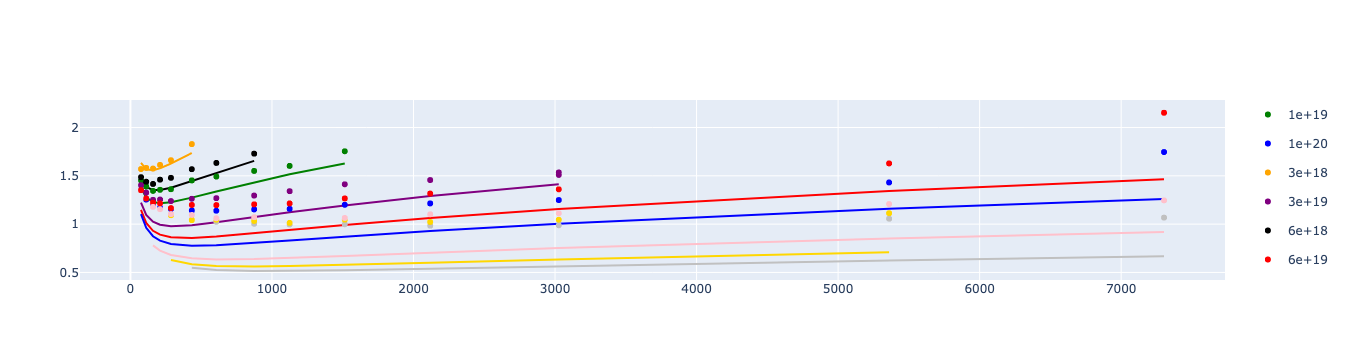

In [46]:
import plotly.express as px
import plotly.graph_objects as go

color_map={
           "3e+18": "orange",
           "6e+18": "black",
           # "3e+18": "brown",
           "1e+19": "green",
           "3e+19": "purple",
           "6e+19": "red",
           "1e+20": "blue",
           "3e+20": "pink",
           "6e+20": "gold",
           "1e+21": "silver",
          }

df_c['compute'] = df_c['compute'].astype(str)
fig = px.scatter(df_c, x='param_count', y='valid_loss', color='compute', 
                 log_x=True, color_discrete_map=color_map)

for compute in color_map.keys():
    tmp_df = df_c[df_c['compute'] == compute]
    df_d = list() 
    for _, row in tmp_df.iterrows():
        pred = scaling_law(row['param_count']*1e6, row['training_tokens'], best_params)
        df_d.append({'prediction': pred, 'param_count': row['param_count'], 'training_tokens': row['training_tokens']})
    fig2 = px.line(pd.DataFrame(df_d).sort_values('param_count'), 
                   x='param_count', y='prediction', log_x=True)
    fig2.update_traces(line_color=color_map[compute], line_width=2)
    fig = go.Figure(data=fig.data + fig2.data)


fig.show()

a 0.43421171268684783
b 0.5657882873131522
G 2.3471842309607793
[{'compute': '1.920000e+19', 'parameters (B)': '0.25', 'tokens (B)': '12.57'}, {'compute': '1.210000e+20', 'parameters (B)': '0.57', 'tokens (B)': '35.63'}, {'compute': '1.230000e+22', 'parameters (B)': '4.21', 'tokens (B)': '486.85'}, {'compute': '5.000000e+22', 'parameters (B)': '7.74', 'tokens (B)': '1076.45'}, {'compute': '5.760000e+23', 'parameters (B)': '22.37', 'tokens (B)': '4290.94'}, {'compute': '3.850000e+24', 'parameters (B)': '51.05', 'tokens (B)': '12570.42'}, {'compute': '9.900000e+24', 'parameters (B)': '76.92', 'tokens (B)': '21449.72'}, {'compute': '3.430000e+25', 'parameters (B)': '131.94', 'tokens (B)': '43326.57'}, {'compute': '1.270000e+26', 'parameters (B)': '232.94', 'tokens (B)': '90867.87'}, {'compute': '1.300000e+28', 'parameters (B)': '1738.07', 'tokens (B)': '1246590.51'}]
        compute parameters (B)  tokens (B)
0  1.920000e+19           0.25       12.57
1  1.210000e+20           0.57       

/tmp/ipykernel_36/3722310796.py:63: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



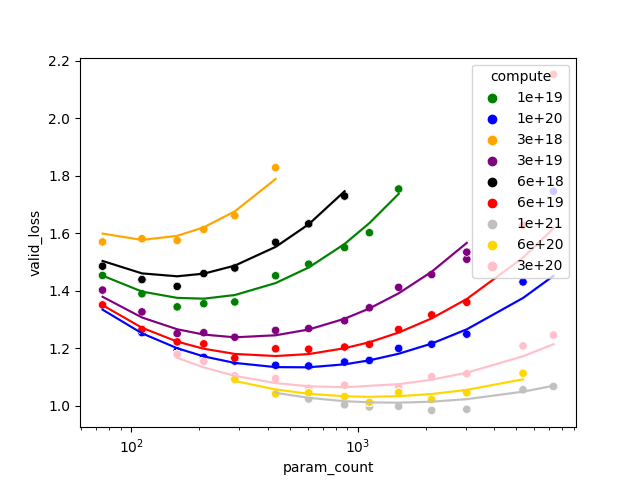

In [85]:
scaling(df_c, "valid_loss", best_params_valid_loss)

# Fit scaling-law to log-mean-pass-rate

In [33]:
df_fit = df[(df["Language"] == "py") & (df["k"] == 100) & (df["PassRate"] > 0)]

In [86]:
df_fit = df_fit[df_fit['param_count'] > 50]

In [87]:
df_fit["LogMeanPassRate"] = -np.log10(df_fit["PassRate"])

/tmp/ipykernel_36/3579164142.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
np.log10(df_fit["PassRate"])

219    -1.293508
276    -1.045142
333    -1.524116
390    -1.148111
447    -1.381370
          ...   
6228   -1.094331
6285   -0.618662
6342   -1.478988
6399   -0.839381
6456   -0.589514
Name: PassRate, Length: 94, dtype: float64

In [89]:
# Fit the log of the mean-pass-rate
inp = torch.Tensor([[N*1e6, D, L] for N, D, L in 
                    zip(df_fit["param_count"], df_fit["training_tokens"], -np.log10(df_fit["PassRate"]))])
inp.require_grad = True

min_loss = 1e10
for a in tqdm(np.linspace(0, 12, 4)):
    for b in np.linspace(0, 12, 4):
        for e in np.linspace(-1, 1, 4):
            for alpha in np.linspace(0, 1, 4):
                for beta in np.linspace(0, 1, 4):
                    l, params = minimize_loss(inp, [a, b, e, alpha, beta])
                    if l < min_loss:
                        min_loss = l
                        best_params = params.detach().numpy()

print(min_loss)
print(best_params)

100%|██████████| 4/4 [06:40<00:00, 100.23s/it]

tensor(0.0041, grad_fn=<SumBackward0>)
[12.973524   7.485582  -1.7878677  0.7341583  0.3434197]


In [37]:
pkl.dump(best_params, open("best_params_log_pass_rate.pkl", "wb"))

In [40]:
# with all experiments: [12.01023 ,    7.3580823,  -2.0502696,   0.6789752,   0.33715153]
# Removing models with less than 50M params: [12.973524,   7.485582,  -1.7878677,  0.7341583,  0.3434197]
best_params = pkl.load(open("best_params_log_pass_rate.pkl", "rb"))

In [162]:
class ScalingLaw(object):
    def __init__(self, params):
        self.params = params
        # loss-scaling wrt model-size
        self.opt_alpha = params[-2]
        # loss-scaling wrt dataset-size
        self.opt_beta = params[-1]

        # Model-size scaling wrt compute
        self.opt_a =  self.opt_beta / (self.opt_alpha+self.opt_beta)
        # Dataset-size scaling wrt compute
        self.opt_b =  self.opt_alpha / (self.opt_alpha+self.opt_beta)

        self.A = np.exp(params[0])
        self.B = np.exp(params[1])
        self.E = np.exp(params[2])
        self.G = ((self.opt_alpha*self.A)/(self.opt_beta*self.B))**(1/(self.opt_alpha+self.opt_beta))

        print("a", self.opt_a)
        print("b", self.opt_b)
        print("G", self.G)
        print("Irreduible loss E", self.E)

    def opt_N_D(self, C):
        opt_N = self.G*(C/6)**self.opt_a
        opt_D = (1/self.G)*(C/6)**self.opt_b
        return opt_N, opt_D
    
    def opt_scaling(self, compute_list, as_str=True):
        scaling = []

        for C in compute_list:
            N, D = self.opt_N_D(C)
            if as_str:
                scaling.append(
                    {"compute": f"{C:e}",
                     "parameters (B)": f"{N/1e9:.2f}",
                     "tokens (B)": f"{D/1e9:.2f}",
                    }
                )
            else:
                scaling.append(
                    {"compute": C,
                     "parameters (B)": N/1e9,
                     "tokens (B)": D/1e9,
                    }
                )
                
        return scaling
    
    def scaling_law(self, N, D):
        """
        Loss as a function of model-size, training tokens
        """
        L =  self.E + (self.A / (N**self.opt_alpha)) + (self.B /(D**self.opt_beta))
        return L

In [135]:
def scaling(df_c, fitted_col, best_params):
    sl = ScalingLaw(best_params)

    # 1 A100-day ~= 1e19
    # 500 * 10 A100-day ~= 5e22
    scaling = sl.opt_scaling([1.92e19, 1.21e20, 1.23e22, 5e22, 5.76e23, 3.85e24, 9.90e24, 3.43e25, 1.27e26, 1.30e28])

    print(scaling)
    print(pd.DataFrame(scaling))
    
    color_map={
               "3e+18": "orange",
               "6e+18": "black",
               # "3e+18": "brown",
               "1e+19": "green",
               "3e+19": "purple",
               "6e+19": "red",
               "1e+20": "blue",
               "3e+20": "pink",
               "6e+20": "gold",
               "1e+21": "silver",
              }

    df_c['compute'] = df_c['compute'].astype(str)
#     fig = px.scatter(df_c, x='param_count', y=fitted_col, color='compute', 
#                      log_x=True, color_discrete_map=color_map)

#     for compute in color_map.keys():
#         tmp_df = df_c[df_c['compute'] == compute]
#         df_d = list() 
#         for _, row in tmp_df.iterrows():
#             pred = scaling_law(row['param_count']*1e6, row['training_tokens'], best_params)
#             df_d.append({'prediction': pred, 'param_count': row['param_count'], 'training_tokens': row['training_tokens']})
#         fig2 = px.line(pd.DataFrame(df_d).sort_values('param_count'), 
#                        x='param_count', y='prediction', log_x=True)
#         fig2.update_traces(line_color=color_map[compute], line_width=2)
#         fig = go.Figure(data=fig.data + fig2.data)


#     fig.show()
    
    plt.figure()
    g = sns.scatterplot(df_c, x="param_count", y=fitted_col,
                    hue='compute', legend="full",
                    palette=color_map,
                    # hue_norm=matplotlib.colors.LogNorm(vmin=df['compute'].min(), vmax = df['compute'].max())
                   )

    for compute, color in color_map.items():
        tmp_df = df_c[df_c['compute'] == compute]
        df_d = list() 
        for _, row in tmp_df.iterrows():
            pred = sl.scaling_law(row['param_count']*1e6, row['training_tokens'])
            df_d.append({'prediction': pred, 'param_count': row['param_count'], 'training_tokens': row['training_tokens']})
        
        g = sns.lineplot(
            pd.DataFrame(df_d).sort_values('param_count'),
            x='param_count', y='prediction',
            color=color,
            ax=g,
            legend=False
        )
        # fig2 = px.line(pd.DataFrame(df_d).sort_values('param_count'), 
        #                x='param_count', y='prediction', log_x=True)
        # fig2.update_traces(line_color=color_map[compute], line_width=2)
        # fig = go.Figure(data=fig.data + fig2.data)
    g.set(xscale="log")
    plt.show()
    
    

a 0.43421171268684783
b 0.5657882873131522
G 2.3471842309607793
[{'compute': '1.920000e+19', 'parameters (B)': '0.25', 'tokens (B)': '12.57'}, {'compute': '1.210000e+20', 'parameters (B)': '0.57', 'tokens (B)': '35.63'}, {'compute': '1.230000e+22', 'parameters (B)': '4.21', 'tokens (B)': '486.85'}, {'compute': '5.000000e+22', 'parameters (B)': '7.74', 'tokens (B)': '1076.45'}, {'compute': '5.760000e+23', 'parameters (B)': '22.37', 'tokens (B)': '4290.94'}, {'compute': '3.850000e+24', 'parameters (B)': '51.05', 'tokens (B)': '12570.42'}, {'compute': '9.900000e+24', 'parameters (B)': '76.92', 'tokens (B)': '21449.72'}, {'compute': '3.430000e+25', 'parameters (B)': '131.94', 'tokens (B)': '43326.57'}, {'compute': '1.270000e+26', 'parameters (B)': '232.94', 'tokens (B)': '90867.87'}, {'compute': '1.300000e+28', 'parameters (B)': '1738.07', 'tokens (B)': '1246590.51'}]
        compute parameters (B)  tokens (B)
0  1.920000e+19           0.25       12.57
1  1.210000e+20           0.57       

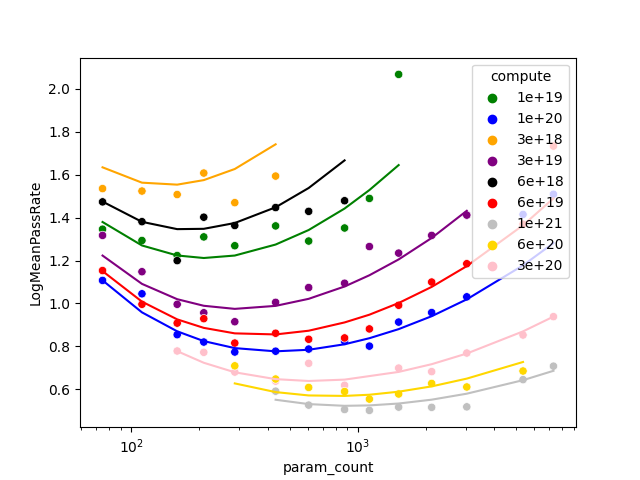

In [136]:
scaling(df_fit, "LogMeanPassRate", best_params)

In [192]:
def plot_efficient_frontier(params, label, ax=None):
    x = "tokens (B)"
    # x = "compute"
    y = "parameters (B)"
    sl = ScalingLaw(params)
    scaling = pd.DataFrame(sl.opt_scaling([1e18, 1.92e19, 1.21e20, 1.23e22, 5e22, 5.76e23, 3.85e24, 9.90e24, 3.43e25], as_str=False))
    print(scaling)
    if ax is None:
        _, ax = plt.subplots()
    # sns.lineplot(scaling, x="parameters (B)", y="tokens (B)", ax=ax, legend=legend)
    ax.plot(scaling[x], scaling[y], label=label)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    print(ax)
    return ax

In [193]:
# a, b, e, alpha, beta
print(best_params)
print(best_params_valid_loss)
print(chinchilla_params)

[12.973524   7.485582  -1.7878677  0.7341583  0.3434197]
[11.228836, 10.483168, -0.12446223, 0.66999114, 0.51418173]
[6.007337896264272, 6.017863020962513, 0.5247285289349821, 0.34, 0.28]


In [194]:
chinchilla_params

[6.007337896264272, 6.017863020962513, 0.5247285289349821, 0.34, 0.28]

a 0.31869593
b 0.6813041
G 329.61407774040055
Irreduible loss E 0.16731657
        compute  parameters (B)     tokens (B)
0  1.000000e+18        0.101517       1.641763
1  1.920000e+19        0.260329      12.292175
2  1.210000e+20        0.468074      43.084451
3  1.230000e+22        2.041621    1004.105790
4  5.000000e+22        3.192137    2610.585242
5  5.760000e+23        6.956041   13800.976025
6  3.850000e+24       12.743785   50351.421841
7  9.900000e+24       17.219454   95822.011300
8  3.430000e+25       25.586241  223427.753801
Axes(0.125,0.11;0.775x0.77)
a 0.43421171268684783
b 0.5657882873131522
G 2.3471842309607793
Irreduible loss E 0.8829716105743158
        compute  parameters (B)    tokens (B)
0  1.000000e+18        0.070547      2.362507
1  1.920000e+19        0.254507     12.573319
2  1.210000e+20        0.566038     35.627775
3  1.230000e+22        4.210758    486.848166
4  5.000000e+22        7.741470   1076.453615
5  5.760000e+23       22.372707   4290.942558
6  3

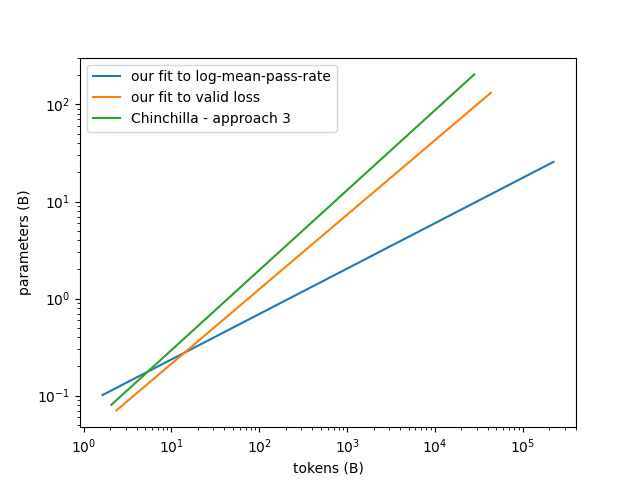

In [196]:
ax = plot_efficient_frontier(best_params, "our fit to log-mean-pass-rate")
ax = plot_efficient_frontier(best_params_valid_loss, "our fit to valid loss", ax=ax)
ax = plot_efficient_frontier(chinchilla_params, "Chinchilla - approach 3",  ax=ax)

# Place some models
# ax.scatter()


ax.legend()
ax.set_xscale("log")
ax.set_yscale("log")
plt.show()

# Can we get mean(log-pass-rate) with a subset of the models

In [200]:
df[(df["Language"] == "py") & (df["k"] == 100) & (df["param_count"] >= 50)]

,BaseDataset,Model,Language,Temperature,NumPassed,NumCompletions,k,PassRate,LogPassRate,idx,...,batch_size_tokens,global_batch_size,learning_rate,num_gpu,training_time,micro_batch_size,training_iters,lr_warmup_iters,name,valid_loss
219,humaneval,bigcode_scalinglaws_run_111.5M_1e+19_bs32_idx_30,py,0.8,1.913043,200.0,100.0,0.050874,NaN,30,...,524000.0,256,0.0003,2,0.464,128,28515,1000,run_111.5M_1e+19_bs32_idx_30,1.389879
276,humaneval,bigcode_scalinglaws_run_111.5M_1e+20_bs32_idx_72,py,0.8,4.329193,200.0,100.0,0.090128,NaN,72,...,524000.0,256,0.0003,8,1.159,32,285152,1000,run_111.5M_1e+20_bs32_idx_72,1.254733
333,humaneval,bigcode_scalinglaws_run_111.5M_3e+18_bs32_idx_6,py,0.8,0.484472,200.0,100.0,0.029915,NaN,6,...,524000.0,256,0.0003,2,0.139,128,8554,855,run_111.5M_3e+18_bs32_idx_6,1.581485
390,humaneval,bigcode_scalinglaws_run_111.5M_3e+19_bs32_idx_43,py,0.8,2.844720,200.0,100.0,0.071103,NaN,43,...,524000.0,256,0.0003,8,0.348,32,85545,1000,run_111.5M_3e+19_bs32_idx_43,1.326845
447,humaneval,bigcode_scalinglaws_run_111.5M_6e+18_bs32_idx_17,py,0.8,1.354037,200.0,100.0,0.041556,NaN,17,...,524000.0,256,0.0003,2,0.278,128,17109,1000,run_111.5M_6e+18_bs32_idx_17,1.439284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6228,humaneval,bigcode_scalinglaws_run_874.2M_3e+19_bs16_idx_49,py,0.8,3.031056,200.0,100.0,0.080477,NaN,49,...,524000.0,256,0.0002,8,0.348,32,10909,1000,run_874.2M_3e+19_bs16_idx_49,1.296066
6285,humaneval,bigcode_scalinglaws_run_874.2M_3e+20_bs16_idx_90,py,0.8,11.372671,200.0,100.0,0.240624,NaN,90,...,524000.0,256,0.0002,16,1.739,16,109094,1000,run_874.2M_3e+20_bs16_idx_90,1.072096
6342,humaneval,bigcode_scalinglaws_run_874.2M_6e+18_bs16_idx_23,py,0.8,0.192547,200.0,100.0,0.033190,NaN,23,...,524000.0,256,0.0002,2,0.278,128,2181,218,run_874.2M_6e+18_bs16_idx_23,1.729686
6399,humaneval,bigcode_scalinglaws_run_874.2M_6e+19_bs16_idx_63,py,0.8,4.776398,200.0,100.0,0.144750,NaN,63,...,524000.0,256,0.0002,8,0.696,32,21818,1000,run_874.2M_6e+19_bs16_idx_63,1.204605
